##### The University of Melbourne, School of Computing and Information Systems
# COMP30027 Machine Learning, 2022 Semester 1

## Assignment 2: Sentiment Classification of Tweets

This is a sample code to assist you with vectorising the 'Train' dataset for your assignment 2.

First we read the CSV datafiles (Train and Test).

In [14]:
# import libraries
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import time
import warnings

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report


In [15]:
warnings.filterwarnings('ignore')

In [16]:
# read data from csv file
train_data = pd.read_csv("Train.csv", sep=',')
test_data = pd.read_csv("Test.csv", sep=',')

### Text Preprocessing

In [17]:
import nltk

#separating instance and label for Train
X_train_raw = [x[0] for x in train_data[['text']].values]
Y_train = [x[0] for x in train_data[['sentiment']].values]

In [18]:
# data cleaning
X_train_raw = train_data['text'].apply(lambda x: re.sub(r'http\S+', '', x))
X_train_raw = X_train_raw.apply(lambda x: re.sub(r'@[A-Za-z0-9]+', '', x))

X_test_raw = test_data['text'].apply(lambda x: re.sub(r'http\S+', '', x))
X_test_raw = X_test_raw.apply(lambda x: re.sub(r'@[A-Za-z0-9]+', '', x))
#X_train_raw = X_train_raw.apply(lambda x: " ".join([re.sub('[^A-Za-z]+','', x)], x
                                    
#check the result
print("Train length:",len(X_train_raw))
#print(X_train_raw[2])
print(X_test_raw.shape)

#separating instance and label for Test

#check the result
print("Test length:",len(X_test_raw))

Train length: 21802
(6099,)
Test length: 6099


### Training test splitting

In [19]:
# hold out
X_train, X_test, y_train, y_test = train_test_split(X_train_raw, Y_train, test_size=0.3, random_state=30)

In [98]:
# BoW 
BoW_vectorizer = CountVectorizer()

X_train_BoW = BoW_vectorizer.fit_transform(X_train_raw)
X_test_BoW = BoW_vectorizer.transform(X_test_raw)

In [20]:
BoW_vectorizer = CountVectorizer()
X_train_BoW = BoW_vectorizer.fit_transform(X_train)
X_test_BoW = BoW_vectorizer.transform(X_test)

In [30]:
for c in [0.01, 0.05, 0.25, 0.5, 1]:
    lr = LogisticRegression(C=c)
    lr.fit(X_train_BoW, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_test, lr.predict(X_test_BoW))))

#Accuracy for C=0.01: 0.6361412628038526
#Accuracy for C=0.05: 0.6665647454517658
#Accuracy for C=0.25: 0.6734444274575753
#Accuracy for C=0.5: 0.6674820363858737
#Accuracy for C=1: 0.6589206543341997
    
model_lr = LogisticRegression(multi_class='ovr')
start = time.time()
model_lr.fit(X_train_BoW, y_train)
end = time.time()
t = end - start
acc = model_lr.score(X_test_BoW, y_test)
print("Logistic Regression Accuracy:", acc, 'Time:', t)

mnb = MultinomialNB().fit(X_train_BoW,y_train)
print(mnb.score(X_test_BoW, y_test))

Accuracy for C=0.01: 0.6268776516454535
Accuracy for C=0.05: 0.6557734204793029
Accuracy for C=0.25: 0.6596720559568857
Accuracy for C=0.5: 0.6573787409700722
Accuracy for C=1: 0.6524481137484234
Logistic Regression Accuracy: 0.6584107327141383 Time: 1.6770210266113281
0.6545120972365555


In [13]:
models = [DummyClassifier(strategy='most_frequent'),
          MultinomialNB(),
          LinearSVC(),
          #DecisionTreeClassifier(),
          KNeighborsClassifier(),
          LogisticRegression()]
titles = ['Zero-R',
          'MNB',
          'LinearSVC',
          #'Decision Tree',
          'KNN',
          'Logistic Regression']

for title, model in zip(titles, models):
    start = time.time()
    model.fit(X_train_BoW.todense(),y_train)
    end = time.time()
    t = end - start
    acc = model.score(X_test_BoW.todense(), y_test)
    print(title, "Accuracy:",acc, 'Time:', t)

Zero-R Accuracy: 0.5844989681265764 Time: 0.7964978218078613
MNB Accuracy: 0.6606282962623251 Time: 24.901389837265015
LinearSVC Accuracy: 0.6193533593212566 Time: 11.232507944107056
KNN Accuracy: 0.562256363219445 Time: 0.3786146640777588
Logistic Regression Accuracy: 0.6599403806466407 Time: 82.65665984153748


Zero-R Accuracy: 0.5882892524078887 Time: 0.4103121757507324

MNB Accuracy: 0.6595321816236049 Time: 34.77994894981384

LinearSVC Accuracy: 0.6280385262192325 Time: 16.23792409896850

Decision Tree Accuracy: 0.5736125974621618 Time: 663.6086249351501

KNN Accuracy: 0.5442592875707079 Time: 0.36096811294555664

Logistic Regression Accuracy: 0.66243693624828 Time: 77.04826092720032

### Feature selecting

In [32]:
# Tfidf Vectorizer
vectorizer= TfidfVectorizer()
tf_x_train = vectorizer.fit_transform(X_train)
tf_x_test = vectorizer.transform(X_test)

for c in [0.01, 0.05, 0.25, 0.5, 1]:
    lr = LogisticRegression(C=c)
    lr.fit(tf_x_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_test, lr.predict(tf_x_test))))
    
#Accuracy for C=0.01: 0.5882892524078887
#Accuracy for C=0.05: 0.6057177801559395
#Accuracy for C=0.25: 0.6480660449472557
#Accuracy for C=0.5: 0.6648830454059013
#Accuracy for C=1: 0.6748203638587372
    
mnb = MultinomialNB().fit(tf_x_train,y_train)
print(mnb.score(tf_x_test, y_test))

clf = LinearSVC(random_state=0)
clf.fit(tf_x_train,y_train)
print(clf.score(tf_x_test, y_test))

final_tfidf = LogisticRegression(C=1)
final_tfidf.fit(tf_x_train,y_train)
print(final_tfidf.score(tf_x_test, y_test))


#Build the feature set (vocabulary) and vectorise the Tarin dataset using TFIDF
#X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_raw)

#Use the feature set (vocabulary) from Train to vectorise the Test dataset 
#X_test_tfidf = tfidf_vectorizer.transform(X_test_raw)

Accuracy for C=0.01: 0.5834193326453389
Accuracy for C=0.05: 0.5979818828116041
Accuracy for C=0.25: 0.6398348813209495
Accuracy for C=0.5: 0.6548560944845775
Accuracy for C=1: 0.6594427244582043
0.5966058938195161
0.6522187822497421
0.6594427244582043


In [42]:
vectorizer= TfidfVectorizer()
tf_x_train = vectorizer.fit_transform(X_train_raw)
tf_x_test = vectorizer.transform(X_test_raw)

In [24]:
vectorizer= TfidfVectorizer()
tf_x_train = vectorizer.fit_transform(X_train_raw)
tf_x_test = vectorizer.transform(X_test_raw)

model_lr = LogisticRegression(multi_class='ovr')
model_lr.fit(tf_x_train, Y_train)

prediction = model_lr.predict(tf_x_test.todense())

print(prediction)
pre = pd.DataFrame(prediction, columns=['sentiment'], index = test_data['id'])
pre.index.name='id'
pre.to_csv(r"tfidf_prediction_cv.csv")

['neutral' 'neutral' 'neutral' ... 'neutral' 'neutral' 'negative']


In [40]:
kbest = SelectKBest(chi2, k=700).fit(tf_x_train, y_train)
kbest_train_X = kbest.transform(tf_x_train)
kbest_test_X = kbest.transform(tf_x_test)

mnb = MultinomialNB().fit(kbest_train_X,y_train)
print(mnb.score(kbest_test_X, y_test))

clf = LinearSVC(random_state=0)
clf.fit(kbest_train_X,y_train)
print(clf.score(kbest_test_X, y_test))

final_tfidf = LogisticRegression(C=1)
final_tfidf.fit(kbest_train_X,y_train)
print(final_tfidf.score(kbest_test_X, y_test))

#0.6026831785345718
#0.6624240339410618
#0.6546267629858961

0.6034858387799564
0.6634560256851278
0.6556587547299622


In [ ]:
kbest = SelectKBest(chi2, k=500).fit(tf_x_train, y_train)
kbest_train_X = kbest.transform(tf_x_train)
kbest_test_X = kbest.transform(tf_x_test)

mnb = MultinomialNB().fit(kbest_train_X,y_train)
print(mnb.score(kbest_test_X, y_test))

clf = LinearSVC(random_state=0)
clf.fit(kbest_train_X,y_train)
print(clf.score(kbest_test_X, y_test))

final_tfidf = LogisticRegression(C=1)
final_tfidf.fit(kbest_train_X,y_train)
print(final_tfidf.score(kbest_test_X, y_test))

In [44]:
kbest = SelectKBest(chi2, k=500).fit(tf_x_train, Y_train)
kbest_train_X = kbest.transform(tf_x_train)
kbest_test_X = kbest.transform(tf_x_test)

print(kbest_train_X.shape)
print(kbest_test_X.shape)
model_lr = LogisticRegression(multi_class='ovr')
model_lr.fit(kbest_train_X, Y_train)
prediction = model_lr.predict(kbest_test_X.todense())

print(prediction)
pre = pd.DataFrame(prediction, columns=['sentiment'], index = test_data['id'])
pre.index.name='id'
pre.to_csv(r"tfidf_lr_prediction_cv.csv")

clf = LinearSVC(random_state=0)
clf.fit(kbest_train_X, Y_train)
prediction = clf.predict(kbest_test_X.todense())
print(prediction)
pre = pd.DataFrame(prediction, columns=['sentiment'], index = test_data['id'])
pre.index.name='id'
pre.to_csv(r"tfidf_clf_prediction_cv.csv")

(21802, 500)
(6099, 500)
['neutral' 'neutral' 'neutral' ... 'neutral' 'neutral' 'negative']
['neutral' 'neutral' 'neutral' ... 'neutral' 'neutral' 'negative']


In [22]:
mnb = MultinomialNB().fit(kbest_train_X,y_train)
print(mnb.score(kbest_test_X, y_test))

clf = LinearSVC(random_state=0)
clf.fit(kbest_train_X,y_train)
print(clf.score(kbest_test_X, y_test))

final_tfidf = LogisticRegression(C=1)
model_lr.fit(kbest_train_X,y_train)
print(model_lr.score(kbest_test_X, y_test))

0.6578766337995873
0.6775968814492089
0.679202017885806


In [40]:
# save the created vocabulary for the given dataset in a separate file

vocab_dict = BoW_vectorizer.vocabulary_
output_pd = pd.DataFrame(list(vocab_dict.items()),columns = ['word','count'])
output_pd.T.to_csv('BoW-vocab.csv',index=False)

(28540, 2)


In [21]:
kbest = SelectKBest(chi2, k=500).fit(X_train_BoW, y_train)
kbest_train_X = kbest.transform(X_train_BoW)
kbest_test_X = kbest.transform(X_test_BoW)

x_train = kbest_train_X
x_test = kbest_test_X
#y_train and y_test remains the same using random state 30

In [100]:
kbest = SelectKBest(chi2, k=500).fit(X_train_BoW, Y_train)
kbest_train_X = kbest.transform(X_train_BoW)
kbest_test_X = kbest.transform(X_test_BoW)

### Model Adapting

In [17]:
# Use the 10_fold_Cross_Validation with 4 models(LinearSVC, Decision Tree, KNN, Logistic Regression)
models = [LinearSVC(),
          DecisionTreeClassifier(),
          KNeighborsClassifier(),
          LogisticRegression()]
titles = ['LinearSVC',
          'Decision Tree',
          'KNN',
          'Logistic Regression']

for title, model in zip(titles, models):
    start = time.time()
    acc = np.mean(cross_val_score(model, x_train, y_train, cv=20))
    end = time.time()
    t = end - start
    print(title, "Accuracy:", acc, 'time:', t)
    
for title, model in zip(titles, models):
    start = time.time()
    acc = np.mean(cross_val_score(model, x_test, y_test, cv=20))
    end = time.time()
    t = end - start
    print(title, "Accuracy:", acc, 'time:', t)

LinearSVC Accuracy: 0.6790325462131005 time: 48.78031897544861


KeyboardInterrupt: 

In [13]:
from sklearn.model_selection import validation_curve, learning_curve

param_range = np.logspace (-2, 2, 10)
train_scores, valid_scores = validation_curve(LinearSVC(), x_train, y_train, param_name='C', param_range=param_range, cv=5, n_jobs=-1, verbose=10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  50 | elapsed:    2.1s remaining:   32.4s
[Parallel(n_jobs=-1)]: Done   9 out of  50 | elapsed:    5.5s remaining:   24.9s
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
[Parallel(n_jobs=-1)]: Done  15 out of  50 | elapsed:   12.6s remaining:   29.3s
/usr/loca

In [14]:
mean_train_scores = np.mean(train_scores, axis=1)
std_train_scores = np.std(train_scores, axis=1)
mean_valid_scores = np.mean(valid_scores, axis=1)
std_valid_scores = np.std(valid_scores, axis=1)

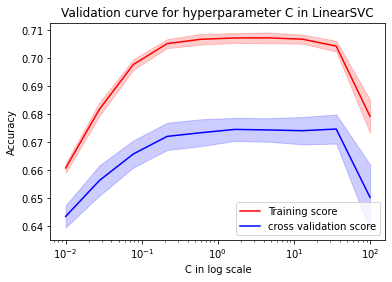

35.93813663804626

[CV] START C=0.027825594022071243...............................................
[CV] END C=0.027825594022071243;, score=(train=0.685, test=0.652) total time=   0.4s
[CV] START C=100.0..............................................................
[CV] END ...........C=100.0;, score=(train=0.675, test=0.636) total time=  10.9s
[CV] START C=0.5994842503189409.................................................
[CV] END C=0.5994842503189409;, score=(train=0.706, test=0.669) total time=   3.7s
[CV] START C=100.0..............................................................
[CV] END ...........C=100.0;, score=(train=0.686, test=0.662) total time=  10.3s
[CV] START C=0.5994842503189409.................................................
[CV] END C=0.5994842503189409;, score=(train=0.710, test=0.670) total time=   4.9s
[CV] START C=12.915496650148826.................................................
[CV] END C=12.915496650148826;, score=(train=0.707, test=0.676) total time=  10.4s
[CV] START C=0.01.

In [15]:
plt.semilogx(param_range, mean_train_scores, label="Training score", color='red')
plt.fill_between(param_range, mean_train_scores - std_train_scores,
                 mean_train_scores + std_train_scores, alpha=0.2, color="red")

plt.semilogx (param_range, mean_valid_scores, label="cross validation score", color='blue')
plt.fill_between(param_range, mean_valid_scores - std_valid_scores,
mean_valid_scores + std_valid_scores, alpha=0.2, color="blue")

plt.legend(loc='best')
plt.title ("Validation curve for hyperparameter C in LinearSVC")
plt.xlabel("C in log scale")
plt.ylabel("Accuracy")
plt.show()

best_C = param_range[mean_valid_scores.argmax()]
best_C

LinearSVC Accuracy: 0.6945133577084409 time: 21.55633020401001
Decision Tree Accuracy: 0.5752541067569892 time: 19.278117895126343
KNN Accuracy: 0.5883426048466088 time: 8.98024296760559
Logistic Regression Accuracy: 0.6947573330940685 time: 8.795934200286865
LinearSVC Accuracy: 0.6219077864031992 time: 5.772023916244507
Decision Tree Accuracy: 0.5573330644890279 time: 3.5276641845703125
KNN Accuracy: 0.5808139261350271 time: 0.9412939548492432
Logistic Regression Accuracy: 0.6389673018113387 time: 3.9775428771972656

In [ ]:
lr = LogisticRegression(C=1, multi_class='ovr').fit(x_train, y_train)
# specify solver and multi_class to avoid warning (or update..
cross_val_score (lr, x_train, y_train, cv=5). mean,lr.score(x_test, y_test)

In [37]:
from sklearn.model_selection import GridSearchCV
param_lr = {'C': [0.01, 0.1, 0.5, 1, 5, 10, 100],
            'multi_class':['multinomial','ovr'],
           }
gs_lr = GridSearchCV(LogisticRegression(),param_lr,cv=5, n_jobs=1, verbose=11)
print ("Performing grid search...")
print ("parameters:")
print (param_lr)
    
gs_lr.fit(x_test,y_test)
print ("Best score: 40. 3f" % gs_lr.best_score_)
print ("Best parameters set:")
           
best_param_lr = gs_lr.best_estimator_.get_params()
    
for param_name in sorted (param_lr.keys()) :
    print ("\t%s: %r" % (param_name, best_param_lr[param_name]))

Performing grid search...
parameters:
{'C': [0.01, 0.1, 0.5, 1, 5, 10, 100], 'multi_class': ['multinomial', 'ovr']}
Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV 1/5; 1/14] START C=0.01, multi_class=multinomial............................
[CV 1/5; 1/14] END C=0.01, multi_class=multinomial;, score=0.607 total time=   0.1s
[CV 2/5; 1/14] START C=0.01, multi_class=multinomial............................
[CV 2/5; 1/14] END C=0.01, multi_class=multinomial;, score=0.608 total time=   0.1s
[CV 3/5; 1/14] START C=0.01, multi_class=multinomial............................
[CV 3/5; 1/14] END C=0.01, multi_class=multinomial;, score=0.611 total time=   0.1s
[CV 4/5; 1/14] START C=0.01, multi_class=multinomial............................
[CV 4/5; 1/14] END C=0.01, multi_class=multinomial;, score=0.609 total time=   0.1s
[CV 5/5; 1/14] START C=0.01, multi_class=multinomial............................
[CV 5/5; 1/14] END C=0.01, multi_class=multinomial;, score=0.615 total time=   0.1

[CV 5/5; 10/14] END .......C=5, multi_class=ovr;, score=0.672 total time=   0.2s
[CV 1/5; 11/14] START C=10, multi_class=multinomial.............................
[CV 1/5; 11/14] END C=10, multi_class=multinomial;, score=0.661 total time=   0.2s
[CV 2/5; 11/14] START C=10, multi_class=multinomial.............................
[CV 2/5; 11/14] END C=10, multi_class=multinomial;, score=0.667 total time=   0.2s
[CV 3/5; 11/14] START C=10, multi_class=multinomial.............................
[CV 3/5; 11/14] END C=10, multi_class=multinomial;, score=0.680 total time=   0.2s
[CV 4/5; 11/14] START C=10, multi_class=multinomial.............................
[CV 4/5; 11/14] END C=10, multi_class=multinomial;, score=0.635 total time=   0.2s
[CV 5/5; 11/14] START C=10, multi_class=multinomial.............................
[CV 5/5; 11/14] END C=10, multi_class=multinomial;, score=0.663 total time=   0.2s
[CV 1/5; 12/14] START C=10, multi_class=ovr.....................................
[CV 1/5; 12/14] EN

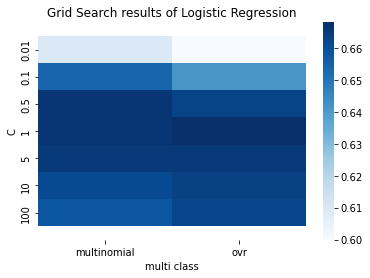

In [38]:
lr_scores = gs_lr.cv_results_['mean_test_score'].reshape(7,2)
sns.heatmap(lr_scores, xticklabels = param_lr['multi_class'], yticklabels=param_lr['C'], cmap='Blues')

b, t= plt. ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt. ylim(b, t) # update the ylim(bottom, top) values
plt. title ("Grid Search results of Logistic Regression")
plt.xlabel ("multi class")
plt.ylabel ("C")
plt.show ()

              precision    recall  f1-score   support

    negative       0.62      0.33      0.43      1099
     neutral       0.68      0.87      0.76      3848
    positive       0.67      0.45      0.54      1594

    accuracy                           0.67      6541
   macro avg       0.66      0.55      0.58      6541
weighted avg       0.67      0.67      0.65      6541

[[ 359  703   37]
 [ 205 3331  312]
 [  18  854  722]]


Text(33.0, 0.5, 'Actual classes')

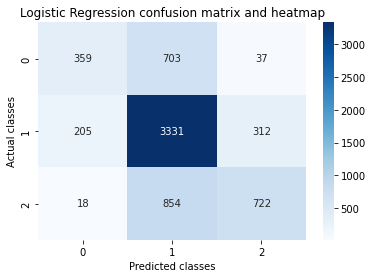

In [44]:
# logistic heatmap
lr = LogisticRegression(C=1).fit(x_train, y_train)
lr_pred = lr.predict(x_test)

matrix_lr = confusion_matrix(y_test, lr_pred)
print(classification_report(y_test, lr_pred))
print(matrix_lr)
sns.heatmap(matrix_lr, cmap = 'Blues', annot = True, fmt = 'd')
plt.title("Logistic Regression confusion matrix and heatmap")
plt.xlabel ("Predicted classes")
plt.ylabel ("Actual classes")

### Ensemble models

In [22]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier


#voting
base_classifiers = [('sgd', SGDClassifier()),
                    ('dt', DecisionTreeClassifier()),
                    ('lr', LogisticRegression(C=1, multi_class='multinomial')),
                    ('mnb' , MultinomialNB()),
                    (' svc', LinearSVC(C=10))]
voting = VotingClassifier(estimators=base_classifiers, voting='hard')
voting.fit(x_train, y_train)
print("voting accuracy")
cross_val_score(voting, x_train, y_train, cv=5).mean(),voting.score(x_test, y_test)


voting accuracy


(0.6777410355025394, 0.673291545635224)

In [ ]:
# bagging
DT = DecisionTreeClassifier()
bagging_one = BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=10,\
                              max_samples=1.0, max_features=1.0)
bagging_two = BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=10,\
                              max_samples=0.5, max_features=1.0)
bagging_three = BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=10,\
                              max_samples=0.5, max_features=0.5)

DT.fit(x_train,y_train)
bagging_one.fit(x_train,y_train)
bagging_two.fit(x_train,y_train)
bagging_three.fit(x_train,y_train)

print("DT:",DT.score(x_test,y_test))
print("Option 1: bagging Accuracy:",bagging_one.score(x_test,y_test))
print("Option 2: bagging Accuracy:",bagging_two.score(x_test,y_test))
print("Option 3: bagging Accuracy:",bagging_three.score(x_test,y_test))

In [ ]:
from sklearn.ensemble import VotingClassifier
#voting
base_classifiers = [('sgd', SGDClassifier()),
                    ('dt', DecisionTreeClassifier()),
                    ('lr', LogisticRegression(C=0.5, multi_class='multinomial')),
                    ('mnb' , MultinomialNB()),
                    (' svc', LinearSVC(C=10))]
voting = VotingClassifier(estimators=base_classifiers, voting='hard')

voting.fit(kbest_train_X.todense(), Y_train)

prediction = voting.predict(kbest_test_X.todense())
#print("Stacker predict done")

print(prediction)
pre = pd.DataFrame(prediction, columns=['sentiment'], index = test_data['id'])
pre.index.name='id'
pre.to_csv(r"voting_prediction_cv.csv")

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


0.6266483201467722


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.0s finished


0.601880518289187
[[ 349 1013  118]
 [ 383 4056  649]
 [  58 1251  844]]
0.6320376103657838


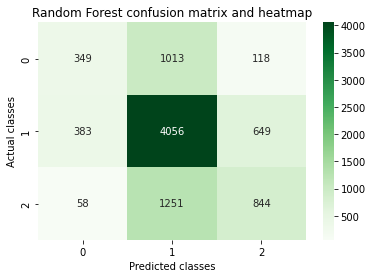

In [72]:
#random forest
rf = RandomForestClassifier(n_jobs=-1, n_estimators=100, verbose=1).fit(x_train, y_train)
print(rf.score(x_test, y_test))

rf = RandomForestClassifier(n_jobs=-1, n_estimators=10, verbose=1).fit(x_train, y_train)
print(rf.score(x_test, y_test))

rf_pred = rf.predict(x_test)
matrix_rf = confusion_matrix(y_test, rf_pred)

print(matrix_rf)
sns.heatmap(matrix_rf, cmap = 'Greens', annot = True, fmt = 'd')
plt.title("Random Forest confusion matrix and heatmap")
plt.xlabel ("Predicted classes")
plt.ylabel ("Actual classes")


#ada
ada = AdaBoostClassifier().fit(x_train,y_train)
print(ada.score(x_test, y_test))

In [23]:
# stacking code from prac 8
np.random.seed(1)

class StackingClassifier():

    def __init__(self, classifiers, metaclassifier):
        self.classifiers = classifiers
        self.metaclassifier = metaclassifier

    def fit(self, X, y):
        for clf in self.classifiers:
            clf.fit(X, y)
        X_meta = self._predict_base(X)
        self.metaclassifier.fit(X_meta, y)
    
    def _predict_base(self, X):
        yhats = []
        for clf in self.classifiers:
            yhat = clf.predict_proba(X)
            yhats.append(yhat)
        yhats = np.concatenate(yhats, axis=1)
        assert yhats.shape[0] == X.shape[0]
        return yhats
    
    def predict(self, X):
        X_meta = self._predict_base(X)     
        yhat = self.metaclassifier.predict(X_meta)
        return yhat
    def score(self, X, y):
        yhat = self.predict(X)
        return accuracy_score(y, yhat)

In [25]:
# base calssifier to be chosen # lr/multinomial
classifiers = [('sgd', SGDClassifier()),
                    ('dt', DecisionTreeClassifier()),
                    ('lr', LogisticRegression(C=0.5, multi_class='multinomial')),
                    ('mnb' , MultinomialNB()),
                    (' svc', LinearSVC(C=10))]

classifiers = [LogisticRegression(),
               SGDClassifier(),
               DecisionTreeClassifier(),
               LinearSVC(C=10),
                MultinomialNB()]
titles = ['Logistic Regression',
          'SGDC',
          'dr',
          'svc',
          'Multinomial NB']
# three meta classifiers
meta_classifier_lr = LogisticRegression()
stacker_lr = StackingClassifier(classifiers, meta_classifier_lr)

meta_classifier_dt = DecisionTreeClassifier()
stacker_dt = StackingClassifier(classifiers, meta_classifier_dt)

meta_classifier_mnb = MultinomialNB()
stacker_mnb = StackingClassifier(classifiers, meta_classifier_mnb)

meta_classifier_svc = LinearSVC(C=10)
stacker_svc = StackingClassifier(classifiers, meta_classifier_svc)

In [ ]:
# base calssifier to be chosen # lr/multinomial
classifiers = [LogisticRegression(),
               #SVC(kernel = "rbf", gamma = 0.001, C=1000),
               KNeighborsRegresson(n_neighbors=20,metric='euclidean'),
                MultinomialNB()]
titles = ['Logistic Regression',
          'SVC',
          'Multinomial NB']

# three meta classifiers
meta_classifier_lr = LogisticRegression(C=1)
stacker_lr = StackingClassifier(classifiers, meta_classifier_lr)

meta_classifier_dt = DecisionTreeClassifier()
stacker_dt = StackingClassifier(classifiers, meta_classifier_dt)

meta_classifier_mnb = MultinomialNB()
stacker_mnb = StackingClassifier(classifiers, meta_classifier_mnb)

meta_classifier_svc = LinearSVC(C=10)
stacker_svc = StackingClassifier(classifiers, meta_classifier_svc)

In [ ]:
start = time.time()
print("im running")
stacker_lr.fit(x_train.todense(), y_train)
end = time.time()
t = end - start
acc_lr = stacker_lr.score(x_test.todense(), y_test)
print('\nStacker Accuracy (Logistic Regression):', acc_lr, 'Time:', t)


start = time.time()
stacker_mnb.fit(x_train.todense(), y_train)
end = time.time()
t = end - start
acc_mnb = stacker_mnb.score(x_test.todense(), y_test)
print('\nStacker Accuracy (Multinomial Regression):', acc_mnb, 'Time:', t)

start = time.time()
stacker_dt.fit(x_train.todense(), y_train)
end = time.time()
t = end - start
acc_dt = stacker_dt.score(x_test.todense(), y_test)
print('\nStacker Accuracy (Decision Tree):', acc_dt, 'Time:', t)

start = time.time()
stacker_svc.fit(x_train.todense(), y_train)
end = time.time()
t = end - start
acc_svc = stacker_svc.score(x_test.todense(), y_test)
print('\nStacker Accuracy (LinearSVC):', acc_svc, 'Time:', t)


### Prediction

In [50]:

stacker_lr.fit(kbest_train_X.todense(), Y_train)
stacker_svc.fit(kbest_train_X.todense(), Y_train)

prediction = stacker_svc.predict(kbest_test_X.todense())
#print("Stacker predict done")

print(prediction)
pre = pd.DataFrame(prediction, columns=['sentiment'], index = test_data['id'])
pre.index.name='id'
pre.to_csv(r"svc_tfidf_prediction_cv.csv")

prediction = stacker_lr.predict(kbest_test_X.todense())
#print("Stacker predict done")
print(prediction)
pre = pd.DataFrame(prediction, columns=['sentiment'], index = test_data['id'])
pre.index.name='id'
pre.to_csv(r"lr_tfidf_prediction_cv.csv")

['negative' 'negative' 'neutral' ... 'neutral' 'positive' 'negative']
['negative' 'negative' 'neutral' ... 'neutral' 'positive' 'negative']
